Chapter 15

# 随机漫步
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用随机游走模拟展示了二项分布在多路径和终点位置分布中的应用。具体步骤如下：

1. **生成路径**：
   - 使用自定义函数 `generate_paths()`，生成一系列随机路径。每一步，路径向上或向下移动 1 个单位，概率分别为 $p=0.4$ 向上，$1-p=0.6$ 向下。路径从 0 开始，累计每一步的移动方向，以形成完整的随机路径。
   - 模拟生成多个路径，每条路径由 20 步构成，总共生成 20 条路径。

2. **路径绘制**：
   - 通过循环，绘制所有路径的轨迹，将每条路径的颜色从 `rainbow` 色谱中选取，保持可视化的区分度。$x$ 轴表示步数，$y$ 轴表示位置。

3. **终点位置的概率分布**：
   - 设置不同数量的路径模拟（50、100、5000），统计每种情况下的终点位置分布。
   - 通过绘制终点位置的直方图展示分布情况，其中终点位置的均值用红色虚线标记。

4. **期望结果**：
   - 随着路径数量增加，终点位置的概率分布呈现近似的对称分布，中心在 0 附近。这是因为模拟的随机游走模型可以近似为二项分布，而二项分布的均值趋近于初始位置，即 0。

In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
np.random.seed(0)  # 设置随机数种子
from matplotlib import cm  # 导入颜色映射库

## 自定义函数 - 生成随机路径

In [2]:
def generate_paths(step_num, path_num, p, up_down):
    # step_num: 步数, path_num: 路径数量, p: 概率, up_down: 步进方向列表
    
    np.random.seed(0)  # 设置随机数种子
    start_locs = np.zeros((1, path_num))  # 定义起始位置为0

    # 生成随机步进
    step_shape = (step_num, path_num)  # 步进矩阵的形状

    steps = np.random.choice(a=up_down, size=step_shape, p=p)  # 根据给定概率生成步进
    paths = np.concatenate([start_locs, steps]).cumsum(0)  # 将起始位置与步进累加得到路径

    return paths  # 返回路径

## 定义路径参数

In [3]:
up_down = [-1, 1]  # 定义步进方向（向下或向上）

p = 0.4  # 向上的概率
probs = [1 - p, p]  # 步进概率

step_num = 20  # 总步数

path_num = 20  # 路径数量

colors = plt.cm.rainbow(np.linspace(0, 1, path_num))  # 生成颜色列表

## 生成随机路径

In [4]:
paths = generate_paths(step_num, path_num, probs, up_down)  # 调用函数生成路径

## 绘制路径图

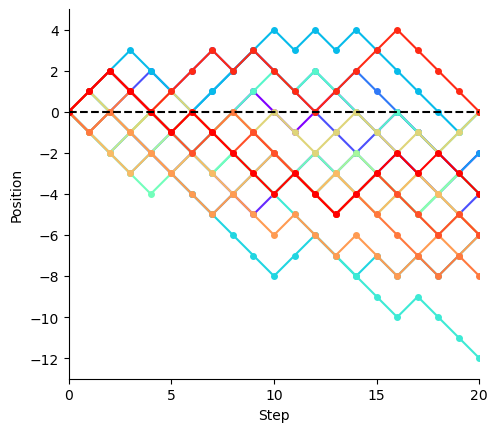

In [5]:
fig, ax = plt.subplots()  # 创建绘图窗口

for i in np.arange(0, path_num):  # 遍历路径数量
    plt.plot(np.arange(step_num + 1), paths[:, i], 
             marker='.', markersize=8, color=colors[i, :])  # 绘制路径

plt.xlabel('Step')  # 设置x轴标签
plt.ylabel('Position')  # 设置y轴标签
plt.axis('scaled')  # 设置坐标轴比例
plt.gca().spines['right'].set_visible(False)  # 隐藏右边框
plt.gca().spines['top'].set_visible(False)  # 隐藏上边框

ax.set_xlim(0, step_num)  # 设置x轴范围
plt.xticks(np.arange(0, step_num + 1, 5))  # 设置x轴刻度

ax.set_ylim(np.floor(paths.min()) - 1, np.ceil(paths.max()) + 1)  # 设置y轴范围

plt.axhline(y=0, linestyle='--', color='k')  # 绘制y=0的水平线

## 不同路径数量下的结束位置分布

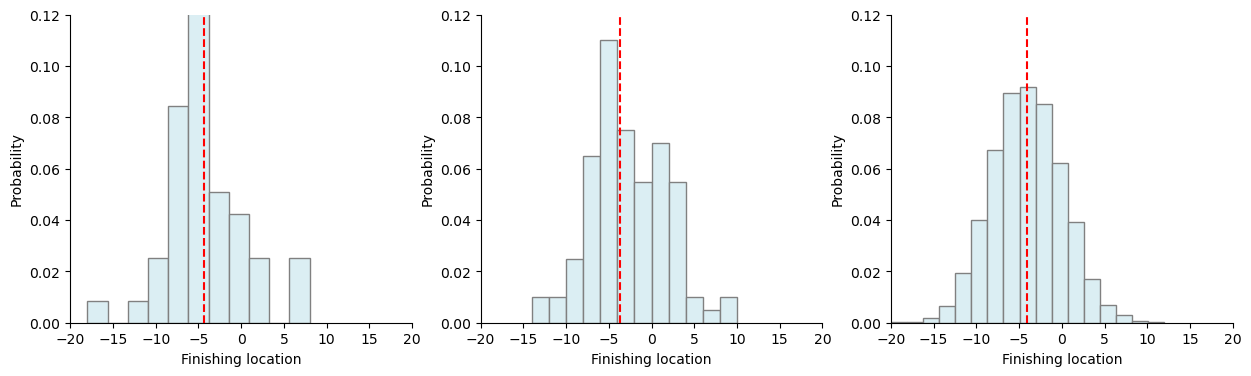

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1, 1]})  # 创建子图

for i, path_num in enumerate([50, 100, 5000]):  # 遍历不同路径数量
    paths = generate_paths(step_num, path_num, probs, up_down)  # 生成路径
    stop_locs = paths[-1, :]  # 获取每条路径的结束位置

    plt.sca(axes[i])  # 设置当前子图
    plt.hist(stop_locs, bins=len(np.unique(stop_locs)), 
             density=True, edgecolor='grey', color='#DBEEF3')  # 绘制结束位置的直方图

    plt.xlim(-step_num, step_num)  # 设置x轴范围
    plt.axvline(x=stop_locs.mean(), linestyle='--', color='r')  # 绘制结束位置的平均值线

    plt.xlabel('Finishing location')  # 设置x轴标签
    plt.ylabel('Probability')  # 设置y轴标签
    plt.gca().spines['right'].set_visible(False)  # 隐藏右边框
    plt.gca().spines['top'].set_visible(False)  # 隐藏上边框
    plt.ylim(0, 0.12)  # 设置y轴范围